Modify emission inputs to NorESM2 for ssp245 modified runs for NorESMem. \
New files are saved to  /proj/bolinc/users/x_maude/AeroGP/modified_emissions/ \
New experiments are: 'inverse' - increasing emissions/inverse of ssp245 and \
                    'mfr-like' - decreasing emissions more rapidly than ssp245 \
October 2023, MCD
Modified August 2024 to only change 'anthro' and not 'bb' or 'air'. Results/outputs have _aonly at the end.

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import netCDF4 as nc

In [3]:
#original emission files:
em_dir = '/proj/cesm_input-data/inputdata//atm/cam/chem/emis/cmip6_emissions_version20190808/'

em_dir_new = '/proj/bolinc/users/x_maude/NorESMem/modified_emissions/'

surf_dict = {
    'BC_ax': 'emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_AX_all_surface_2014-2301_1.9x2.5_version20190808.nc',
    'BC_n': 'emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_N_all_surface_2014-2301_1.9x2.5_version20190808.nc',
    'SO2': 'emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_SO2_all_surface_2014-2301_1.9x2.5_version20190808.nc',
}

vert_dict = {
    'BC_ax_vert': 'emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_AX_all_vertical_2014-2301_1.9x2.5_version20190808.nc',
    'BC_ni_vert': 'emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_NI_all_vertical_2014-2301_1.9x2.5_version20190808.nc',
    'BC_n_vert': 'emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_N_all_vertical_2014-2301_1.9x2.5_version20190808.nc',
    'SO2_vert': 'emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_SO2_all_vertical_2014-2301_1.9x2.5_version20190808.nc',
}


In [4]:
#copy emission files to modify for each new experiment:

for exp in ['inv_aonly','mfr_aonly']:
    for file_name in surf_dict.values():
        org_path = os.path.join(em_dir, file_name)
        new_path = os.path.join(em_dir_new, file_name[:-3] + '_' + exp + '.nc')
        shutil.copy(org_path, new_path)

    for file_name in vert_dict.values():
        org_path = os.path.join(em_dir, file_name)
        new_path = os.path.join(em_dir_new, file_name[:-3] + '_' + exp + '.nc')
        shutil.copy(org_path, new_path)

In [5]:
#modify copied emission files for inverse case (emissions increasing):

mod_files = os.listdir(em_dir_new)

for file_name in mod_files:
    #each file is modified differently, depending on the species:
    if all(x in file_name for x in ['inv','all_surface']):

        print(file_name)
        ds = nc.Dataset(em_dir_new+file_name,'r+',clobber=True)

        anthmod = ds['emiss_anthrosurf_ALL'][:]*-1.0 + 2.0*ds['emiss_anthrosurf_ALL'][0]
        anthmod = anthmod.clip(min=0)
        ds['emiss_anthrosurf_ALL'][:] = anthmod

        ds.close()

    if all(x in file_name for x in ['inv','BC_AX','all_vertical']):

        print(file_name)
        ds = nc.Dataset(em_dir_new+file_name,'r+',clobber=True)

        anthmod = ds['emiss_anthroprof_ALL'][:]*-1.0 + 2.0*ds['emiss_anthroprof_ALL'][0]
        anthmod = anthmod.clip(min=0)
        ds['emiss_anthroprof_ALL'][:] = anthmod

        #airmod = ds['emiss_air_ALL'][:]*-1.0 + 2.0*ds['emiss_air_ALL'][0]
        #airmod = airmod.clip(min=0)
        #ds['emiss_air_ALL'][:] = airmod

        ds.close()     
     
    if all(x in file_name for x in ['inv','BC_N_','all_vertical']):

        print(file_name)
        ds = nc.Dataset(em_dir_new+file_name,'r+',clobber=True)

        anthmod = ds['emiss_anthroprof_ALL'][:]*-1.0 + 2.0*ds['emiss_anthroprof_ALL'][0]
        anthmod = anthmod.clip(min=0)
        ds['emiss_anthroprof_ALL'][:] = anthmod

        #airmod = ds['emiss_air_ALL'][:]*-1.0 + 2.0*ds['emiss_air_ALL'][0]
        #airmod = airmod.clip(min=0)
        #ds['emiss_air_ALL'][:] = airmod

        ds.close()

    #if all(x in file_name for x in ['inv','BC_NI_','all_vertical']):

        #print(file_name)
        #ds = nc.Dataset(em_dir_new+file_name,'r+',clobber=True)

        #bbmod = ds['emiss_bb_ALL'][:]*-1.0 + 2.0*ds['emiss_bb_ALL'][0]
        #bbmod = bbmod.clip(min=0)
        #ds['emiss_bb_ALL'][:] = bbmod

        #ds.close()

    if all(x in file_name for x in ['inv','SO2','all_vertical']):

        print(file_name)
        ds = nc.Dataset(em_dir_new+file_name,'r+',clobber=True)

        anthmod = ds['emiss_anthroprof_ALL'][:]*-1.0 + 2.0*ds['emiss_anthroprof_ALL'][0]
        anthmod = anthmod.clip(min=0)
        ds['emiss_anthroprof_ALL'][:] = anthmod

        #bbmod = ds['emiss_bb_ALL'][:]*-1.0 + 2.0*ds['emiss_bb_ALL'][0]
        #bbmod = bbmod.clip(min=0)
        #ds['emiss_bb_ALL'][:] = bbmod

        #airmod = ds['emiss_air_ALL'][:]*-1.0 + 2.0*ds['emiss_air_ALL'][0]
        #airmod = airmod.clip(min=0)
        #ds['emiss_air_ALL'][:] = airmod

        ds.close()
 


emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_AX_all_vertical_2014-2301_1.9x2.5_version20190808_inv_aonly.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_N_all_vertical_2014-2301_1.9x2.5_version20190808_inv.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_N_all_surface_2014-2301_1.9x2.5_version20190808_inv.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_AX_all_surface_2014-2301_1.9x2.5_version20190808_inv.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_AX_all_vertical_2014-2301_1.9x2.5_version20190808_inv.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_SO2_all_vertical_2014-2301_1.9x2.5_version20190808_inv_aonly.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_SO2_all_surface_2014-2301_1.9x2.5_version20190808_inv_aonly.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_N_all_surface_2014-2301_

In [6]:
for file_name in mod_files:
    #each file is modified differently, depending on the species:
    if all(x in file_name for x in ['mfr','all_surface']):

        print(file_name)
        ds = nc.Dataset(em_dir_new+file_name,'r+',clobber=True)

        anthmod = ds['emiss_anthrosurf_ALL'][:] - 0.5*(ds['emiss_anthrosurf_ALL'][0] - ds['emiss_anthrosurf_ALL'][:])
        anthmod = anthmod.clip(min=0)
        ds['emiss_anthrosurf_ALL'][:] = anthmod

        ds.close()

    if all(x in file_name for x in ['mfr','BC_AX','all_vertical']):

        print(file_name)
        ds = nc.Dataset(em_dir_new+file_name,'r+',clobber=True)

        anthmod = ds['emiss_anthroprof_ALL'][:] - 0.5*(ds['emiss_anthroprof_ALL'][0] - ds['emiss_anthroprof_ALL'][:])
        anthmod = anthmod.clip(min=0)
        ds['emiss_anthroprof_ALL'][:] = anthmod

        #airmod = ds['emiss_air_ALL'][:] - 0.5*(ds['emiss_air_ALL'][0] - ds['emiss_air_ALL'][:])
        #airmod = airmod.clip(min=0)
        #ds['emiss_air_ALL'][:] = airmod

        ds.close()

    if all(x in file_name for x in ['mfr','BC_N_','all_vertical']):

        print(file_name)
        ds = nc.Dataset(em_dir_new+file_name,'r+',clobber=True)

        anthmod = ds['emiss_anthroprof_ALL'][:] - 0.5*(ds['emiss_anthroprof_ALL'][0] - ds['emiss_anthroprof_ALL'][:])
        anthmod = anthmod.clip(min=0)
        ds['emiss_anthroprof_ALL'][:] = anthmod

        #airmod = ds['emiss_air_ALL'][:] - 0.5*(ds['emiss_air_ALL'][0] - ds['emiss_air_ALL'][:])
        #airmod = airmod.clip(min=0)
        #ds['emiss_air_ALL'][:] = airmod

        ds.close()

    #if all(x in file_name for x in ['mfr','BC_NI_','all_vertical']):
        
        #print(file_name)
        #ds = nc.Dataset(em_dir_new+file_name,'r+',clobber=True)

        #bbmod = ds['emiss_bb_ALL'][:] - 0.5*(ds['emiss_bb_ALL'][0] - ds['emiss_bb_ALL'][:])
        #bbmod = bbmod.clip(min=0)
        #ds['emiss_bb_ALL'][:] = bbmod

        #ds.close()

    if all(x in file_name for x in ['mfr','SO2','all_vertical']):

        print(file_name)
        ds = nc.Dataset(em_dir_new+file_name,'r+',clobber=True)

        anthmod = ds['emiss_anthroprof_ALL'][:] - 0.5*(ds['emiss_anthroprof_ALL'][0] - ds['emiss_anthroprof_ALL'][:])
        anthmod = anthmod.clip(min=0)
        ds['emiss_anthroprof_ALL'][:] = anthmod

        #bbmod = ds['emiss_bb_ALL'][:] - 0.5*(ds['emiss_bb_ALL'][0] - ds['emiss_bb_ALL'][:])
        #bbmod = bbmod.clip(min=0)
        #ds['emiss_bb_ALL'][:] = bbmod

        #airmod = ds['emiss_air_ALL'][:] - 0.5*(ds['emiss_air_ALL'][0] - ds['emiss_air_ALL'][:])
        #airmod = airmod.clip(min=0)
        #ds['emiss_air_ALL'][:] = airmod

        ds.close()

emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_N_all_surface_2014-2301_1.9x2.5_version20190808_mfr.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_N_all_surface_2014-2301_1.9x2.5_version20190808_mfr_aonly.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_N_all_vertical_2014-2301_1.9x2.5_version20190808_mfr.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_AX_all_surface_2014-2301_1.9x2.5_version20190808_mfr.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_BC_N_all_vertical_2014-2301_1.9x2.5_version20190808_mfr_aonly.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_SO2_all_vertical_2014-2301_1.9x2.5_version20190808_mfr_aonly.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_SO2_all_vertical_2014-2301_1.9x2.5_version20190808_mfr.nc
emissions_cmip6_noresm2_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_SO2_all_surface_2014-2301_1.9

/proj/bolinc/users/x_maude/.conda/envs/ESMmenv/lib/python3.8/site-packages/xarray/coding/times.py:682: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/proj/bolinc/users/x_maude/.conda/envs/ESMmenv/lib/python3.8/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/proj/bolinc/users/x_maude/.conda/envs/ESMmenv/lib/python3.8/site-packages/xarray/coding/times.py:682: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/pr

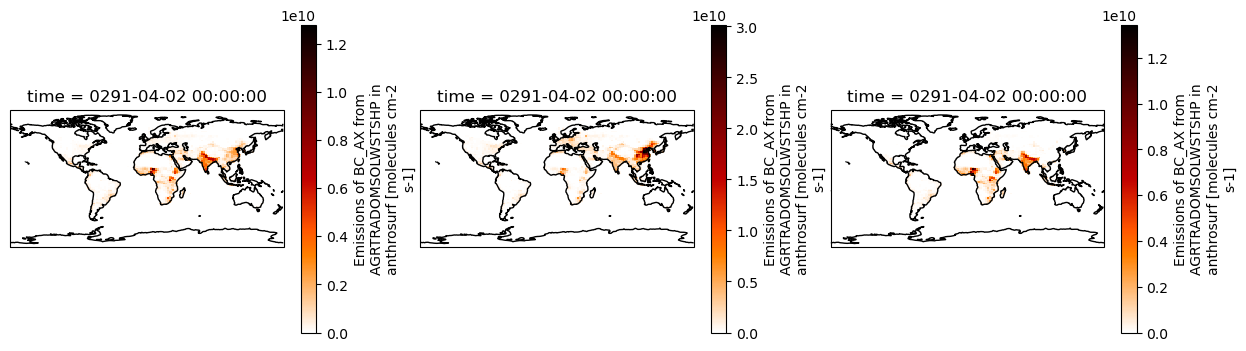

In [7]:
#plot to check perturbations are correct:

#BC_ax
ds_org = xr.open_dataset(em_dir + surf_dict['BC_ax'])
ds_inv = xr.open_dataset(em_dir_new + surf_dict['BC_ax'][:-3]+'_inv_aonly.nc')
ds_half = xr.open_dataset(em_dir_new + surf_dict['BC_ax'][:-3]+'_mfr_aonly.nc')
emiss_org = ds_org['emiss_anthrosurf_ALL']
emiss_inv = ds_inv['emiss_anthrosurf_ALL']
emiss_half = ds_half['emiss_anthrosurf_ALL']

import cartopy.crs as ccrs
from matplotlib import colors

fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 4))
emiss_org[50].plot.pcolormesh(ax=axes[0],cmap='gist_heat_r',)
axes[0].coastlines()
emiss_inv[50].plot.pcolormesh(ax=axes[1],cmap='gist_heat_r')
axes[1].coastlines()
emiss_half[50].plot.pcolormesh(ax=axes[2],cmap='gist_heat_r')
axes[2].coastlines()

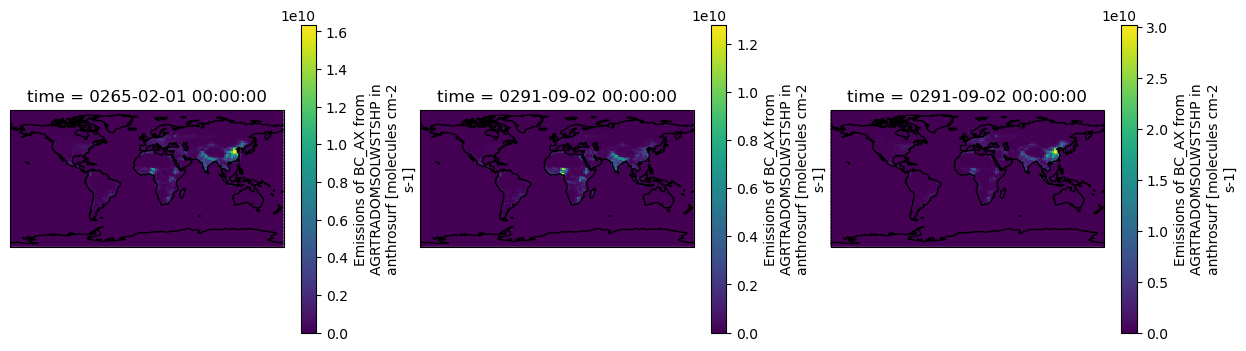

In [51]:
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 4))
(emiss_org[0]).plot.pcolormesh(ax=axes[0])
axes[0].coastlines()
(emiss_org[55]).plot.pcolormesh(ax=axes[1])
axes[1].coastlines()
(emiss_inv[55]).plot.pcolormesh(ax=axes[2])
axes[2].coastlines()

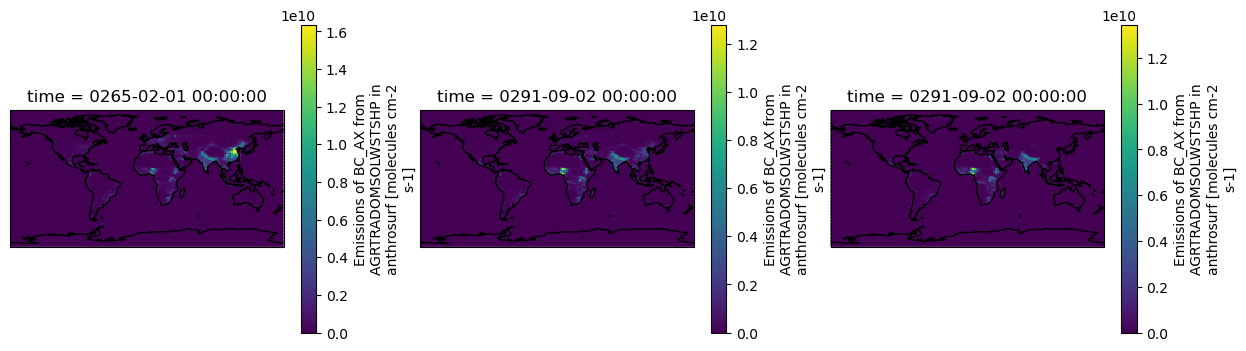

In [52]:
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 4))
(emiss_org[0]).plot.pcolormesh(ax=axes[0])
axes[0].coastlines()
(emiss_org[55]).plot.pcolormesh(ax=axes[1])
axes[1].coastlines()
(emiss_half[55]).plot.pcolormesh(ax=axes[2])
axes[2].coastlines()

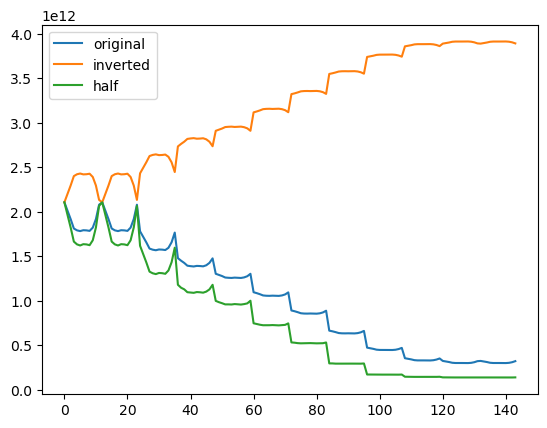

In [53]:
sum_org = emiss_org.sum(['lat','lon'])
sum_inv = emiss_inv.sum(['lat','lon'])
sum_half = emiss_half.sum(['lat','lon'])
plt.plot(sum_org.values,label='original')
plt.plot(sum_inv.values,label='inverted')
plt.plot(sum_half.values,label='half')
plt.legend()